 <h1><center>SEA Building Energy Prediction - Modeling </center></h1>

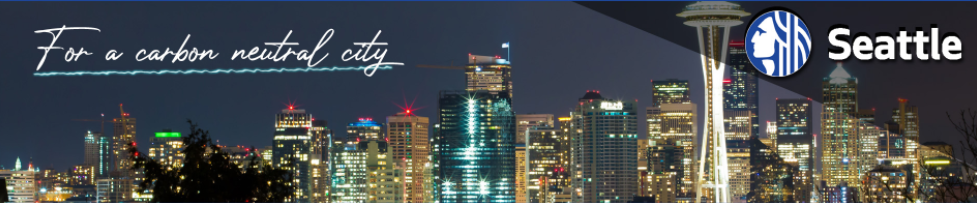

### Project display

To achieve its goal of being a carbon-neutral city by 2050, the city of Seattle is paying close attention to emissions from non-residential buildings.

**Data**

The data can be downloaded at [this address](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv).

**City of Seattle issue**

Detailed readings were taken by your agents in 2015 and 2016. However, these readings are expensive to obtain, and from those already taken, you want to try to predict the CO2 emissions and the total energy consumption of buildings for which they have not yet been measured.

**The mission**

- Carry out a short exploratory analysis.
- Test different prediction models in order to best respond to the problem. 

# <font color="b">Table of contents</font>

## <font color="b" id="section_1">1. Import librairies and Get the data</font>
### <font color="b" id="section_1_1">1.1 Import libraries</font>
### <font color="b" id="section_1_2">1.2 Get the data</font>
## <font color="b" id="section_2">2. Feature selection and feature importance.</font>
### <font color="b" id="section_2_1">2.1. Create a train and test Set.</font>
### <font color="b" id="section_2_2">2.2. Numerical Feature Selection.</font>
### <font color="b" id="section_2_3">2.3. Categorical Feature Selection.</font>
## <font color="b" id="section_3">3. Modeling </font>
### <font color="b" id="section_3_1">3.1 Modeling with selected features </font>
#### <font color="b" id="section_3_1_1">3.1.1 With ENERGYSTARScore </font>
#### <font color="b" id="section_3_1_2">3.1.1 Without ENERGYSTARScore </font>
### <font color="b" id="section_3_1">3.2 Modeling with all features </font>
#### <font color="b" id="section_3_1_1">3.2.1 With ENERGYSTARScore </font>
#### <font color="b" id="section_3_1_2">3.2.1 Without ENERGYSTARScore </font>

## <font color="b" id="section_1">1. Import librairies and Get the data</font>

### <font color="b" id="section_1_1">1.1 Import libraries</font>

In [1]:
from Setle_modeling_functions import *

### <font color="b" id="section_1_2">1.2 Get the data</font>

In [2]:
# # Load pickle from disk
df = pd.read_pickle('pickle-df.pkl')
#df = pd.read_pickle('pickle-file.pkl.gz', compression='gzip')

In [3]:
df.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge,GFAPerBuilding
0,NonResidential,Hotel/Hospital/Housing,7,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,0,88434.0,Hotel,Hotel/Hospital/Housing,60.0,7226362.5,249.98,2.83,89,88434.0
1,NonResidential,Hotel/Hospital/Housing,7,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,15064,88502.0,"Hotel, Parking, Restaurant",Hotel/Hospital/Housing,61.0,8387933.0,295.86,2.86,20,103566.0
2,NonResidential,Hotel/Hospital/Housing,7,DOWNTOWN,47.61393,-122.33810,1.0,41.0,956110.0,196718,759392.0,Hotel,Hotel/Hospital/Housing,43.0,72587024.0,2089.28,2.19,47,956110.0
3,NonResidential,Hotel/Hospital/Housing,7,DOWNTOWN,47.61412,-122.33664,1.0,10.0,61320.0,0,61320.0,Hotel,Hotel/Hospital/Housing,56.0,6794584.0,286.43,4.67,90,61320.0
4,NonResidential,Hotel/Hospital/Housing,7,DOWNTOWN,47.61375,-122.34047,1.0,18.0,175580.0,62000,113580.0,"Hotel, Parking, Swimming Pool",Hotel/Hospital/Housing,75.0,14172606.0,505.01,2.88,36,175580.0


In [4]:
# check if the data types are well preserved
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               1648 non-null   object 
 1   PrimaryPropertyType        1648 non-null   object 
 2   CouncilDistrictCode        1648 non-null   object 
 3   Neighborhood               1648 non-null   object 
 4   Latitude                   1648 non-null   float64
 5   Longitude                  1648 non-null   float64
 6   NumberofBuildings          1648 non-null   float64
 7   NumberofFloors             1648 non-null   float64
 8   PropertyGFATotal           1648 non-null   float64
 9   PropertyGFAParking         1648 non-null   int64  
 10  PropertyGFABuilding(s)     1648 non-null   float64
 11  ListOfAllPropertyUseTypes  1648 non-null   object 
 12  LargestPropertyUseType     1648 non-null   object 
 13  ENERGYSTARScore            1648 non-null   float

In [5]:
df = df.drop(['TotalGHGEmissions', 'GHGEmissionsIntensity'], axis =1)

## <font color="b" id="section_2">2. Feature selection and feature importance.</font>

**In order to ovoide data snooping bias and the overfitting, it is important to create now a train set and test set. Even if we could create them from the beginning to avoid any influence that the data has on our brain, but creating it after the selection of the features, is not a good idea at all.**

### <font color="b" id="section_2_1">2.1. Create a train and test Set.</font>

**The scikit-learn library will be used, and we will consider the default values without going into the details of the hyperparameters, the methods and techniques used.**

We will use the train_test_split() function form scikit-learn and use 80 percent of the data for training and 20 percent for testing.

In [6]:
# Creation of trainset and testset with a proportion of 20%.
trainset, testset = train_test_split(df, test_size=0.2, random_state=100)

In [7]:
print('Train', trainset.shape)
print('Test', testset.shape)

Train (1318, 17)
Test (330, 17)


We can see that we have 1318 examples for training and 330 for testing.

### <font color="b" id="section_2_2">2.2. Numerical Feature Selection.</font>

There are three popular feature selection cathegories that can be used for numerical input data and a numerical target variable.

They are:

    1- Filter methods.
    2- Wrapper methods
    3- Embedded methods

In this project we will use two or three for each category.
    
    1- Filter methods:
       1. Correlation Statistics.
       2. Mutual Information Statistics.
       3. Correlation Matrix with Heatmap
       
    2- Wrapper methods:
       1. Recursive Feature Elimination
       2. Recursive Feature Elimination with Cross-Validation
       
    3- Embedded methods:
       1. LASSO
       2. RIDGE
       3. Random Forest

In [8]:
# create a trainset for numerical variables
train_num = trainset.select_dtypes(['int', 'float'])
test_num = testset.select_dtypes(['int', 'float'])

In [9]:
x_train, y_enrgy_train = preprocessing(train_num)

In [10]:
x_test, y_enrgy_test = preprocessing(test_num)

In [11]:
#Standarisation of the x_train and y_train
stand_t = StandardScaler()
x_std = stand_t.fit_transform(x_train)
x_test_std = stand_t.fit_transform(x_test)
y_std = stand_t.fit_transform(y_enrgy_train.to_frame())
y_test_std = stand_t.fit_transform(y_enrgy_test.to_frame())

#### 2.2.1 Filter methods

#### 2.2.1.1 Correlation Feature Selection

Correlation is a measure of how two variables change together. Probably the most common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship.
Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship.

The scikit-learn machine library provides an implementation of the correlation statistic in the "f_regression()" function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [12]:
x_train_fs_enrg, fs_enrg = correlation_select_features(x_train, y_enrgy_train)

In [13]:
ranked_features = pd.Series(fs_enrg.scores_, index=x_train.columns)
ranked_features

Latitude                     0.306801
Longitude                    0.312921
NumberofBuildings           95.861401
NumberofFloors             166.319521
PropertyGFATotal           952.673507
PropertyGFAParking          76.521100
PropertyGFABuilding(s)    1070.935312
ENERGYSTARScore              1.436485
BuildingAge                 35.807232
GFAPerBuilding             417.583373
dtype: float64

Text(0.5, 0, 'Features')

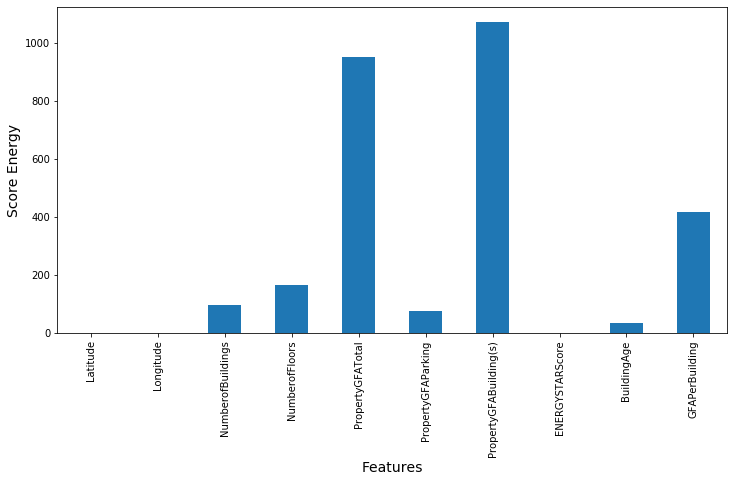

In [14]:
plt.figure(figsize=(12,6))
ranked_features.plot.bar()
plt.ylabel('Score Energy', size=14)
plt.xlabel('Features', size=14)

- A bar chart of the feature importance scores for each input feature is created.

- The plot clearly shows 8 to 10 features are a lot more important than the other features.

- We could set k=10 When configuring the SelectKBest to select these top features.

#### 2.2.1.2 Mutual Information Feature Selection

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [15]:
x_train_fs_enrg, fs_enrg = mutual_select_features(x_train, y_enrgy_train)

In [16]:
# what are scores for the features
ranked_features = pd.Series(fs_enrg.scores_, index=x_train.columns)
ranked_features

Latitude                  0.109262
Longitude                 0.070379
NumberofBuildings         0.015093
NumberofFloors            0.171384
PropertyGFATotal          0.452196
PropertyGFAParking        0.132027
PropertyGFABuilding(s)    0.451522
ENERGYSTARScore           0.052408
BuildingAge               0.067067
GFAPerBuilding            0.396429
dtype: float64

Text(0.5, 0, 'Features')

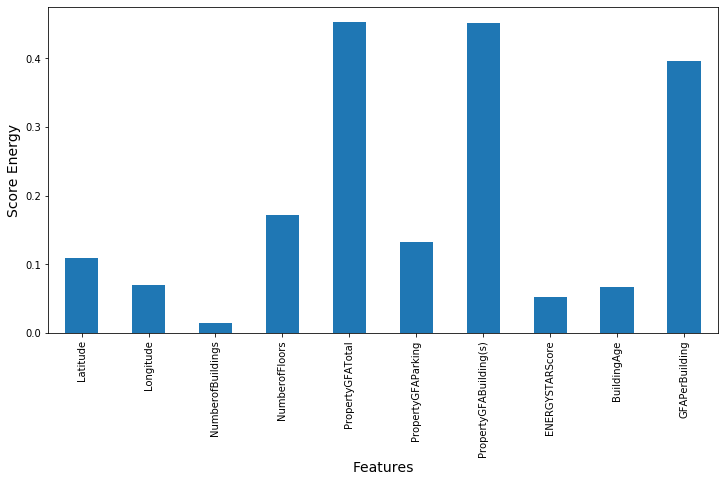

In [17]:
plt.figure(figsize=(12,6))
ranked_features.plot.bar()
plt.ylabel('Score Energy', size=14)
plt.xlabel('Features', size=14)

- A bar chart of the feature importance scores for each input feature is created.

- Compared to the correlation feature selection method we can clearly see many more features scored as being relevant.

#### 2.2.1.3. Correlation Matrix with Heatmap

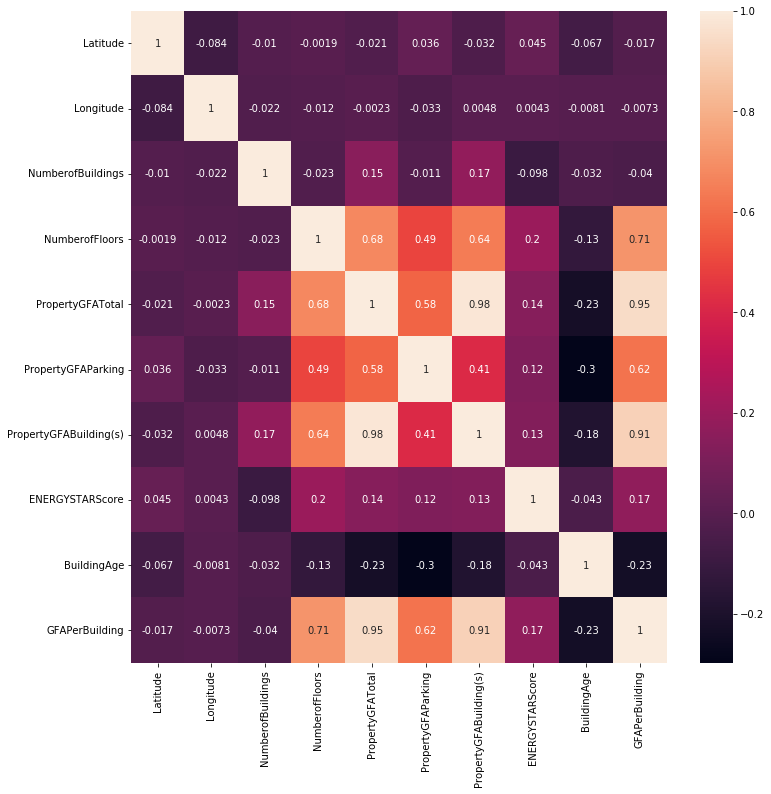

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True)

We will look in detail at the correlation between each pair of variables.

In [19]:
# We select the independent features more correlated >0.7.
threshold_up = 0.7
corr_pairs = x_train.corr().unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
6,PropertyGFATotal,PropertyGFABuilding(s),0.981824
4,PropertyGFATotal,GFAPerBuilding,0.946840
2,GFAPerBuilding,PropertyGFABuilding(s),0.913287
0,GFAPerBuilding,NumberofFloors,0.711901


**Observations**:
The variable "GFAPerBuilding" occurs three times, and the variable "PropertyGFABuilding(s)" and "PropertyGFATotal" occur two times.

In [20]:
# Verification of multicollinearity with the VIF (Variance Inflation Factor).
strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_df[vif_df['VIF'] > 5]

,Feature,VIF
0,GFAPerBuilding,10.789839
1,PropertyGFABuilding(s),38.588319
2,PropertyGFATotal,56.711358


**Observations**:
The variable "GFAPerBuilding" occurs three times, and the variable "PropertyGFABuilding(s)" and "PropertyGFATotal" occur two times.

In [21]:
# We select the indepedante features more correlated >0.7 to be deleted. 
correlation(x_train,0.7)

{'GFAPerBuilding', 'PropertyGFABuilding(s)'}

*We are not going to delete them now because we have to do other tests to be sure of the choice. Maybe one variable plays a more important role than another.*

#### 2.2.2 Wrapper methods: Recursive Feature Elimination and Recursive Feature with Cross-Validation

Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration.

In [22]:
# We use Linear Regression as model to select features
lin_reg = LinearRegression()

In [23]:
# We create models with RFE and RFECV.
ref_mod = RFE(lin_reg)
refcv_mod = RFECV(lin_reg, cv=5)

In [24]:
# Fit the models
refe_values = ref_mod.fit(x_train,y_enrgy_train)
refecv_values = refcv_mod.fit(x_train,y_enrgy_train)

In [25]:
# we display the feature selected.
print("Selected features with RFE:", list(x_train.columns[refe_values.support_]))
print("Selected features with RFECV:", list(x_train.columns[refecv_values.support_]))     

Selected features with RFE: ['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'BuildingAge']
Selected features with RFECV: ['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'BuildingAge', 'GFAPerBuilding']


In [26]:
print("Optimal number of features for RFE : %d" % refe_values.n_features_)
print("Optimal number of features for RFECV: %d" % refecv_values.n_features_)

Optimal number of features for RFE : 5
Optimal number of features for RFECV: 10


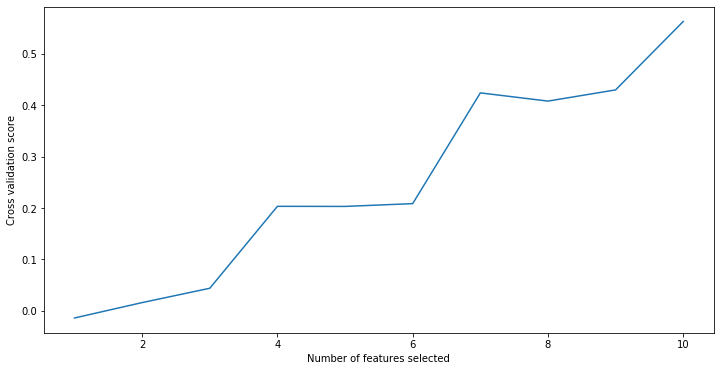

In [27]:
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(refecv_values.grid_scores_) + 1), refecv_values.grid_scores_)

#### 2.2.3 Embedded methods

#### 2.2.3.1 With LASSO model

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

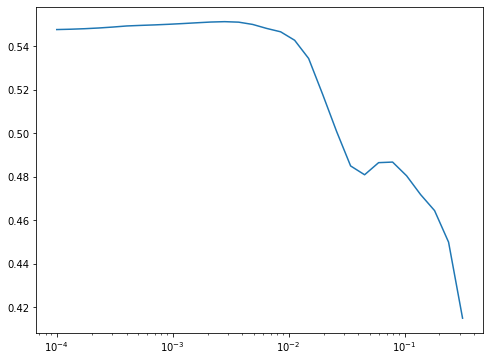

In [28]:
lasso = Lasso(random_state=10, max_iter=100000)
alphas = np.logspace(-4,-0.5,30)
tuned_parmeters = [{"alpha":alphas}]
n_folds = 5
lasso_cv = GridSearchCV(lasso, tuned_parmeters, cv=n_folds, refit=False)
lasso_cv.fit(x_std,y_std)

scores = lasso_cv.cv_results_["mean_test_score"]
scores
plt.figure().set_size_inches(8,6)
plt.semilogx(alphas, scores)

In [29]:
best_alpha = lasso_cv.best_params_
print(best_alpha)

{'alpha': 0.0028072162039411755}


                  Columns  Coefficient Estimate
0                Latitude              0.000000
1               Longitude              0.000000
2       NumberofBuildings             61.667059
3          NumberofFloors             -0.000000
4        PropertyGFATotal              0.000000
5      PropertyGFAParking              0.000000
6  PropertyGFABuilding(s)            557.176333
7         ENERGYSTARScore             -0.000000
8             BuildingAge             -0.000000
9          GFAPerBuilding             -0.000000


Text(0.5, 1.0, 'Feature Selections')

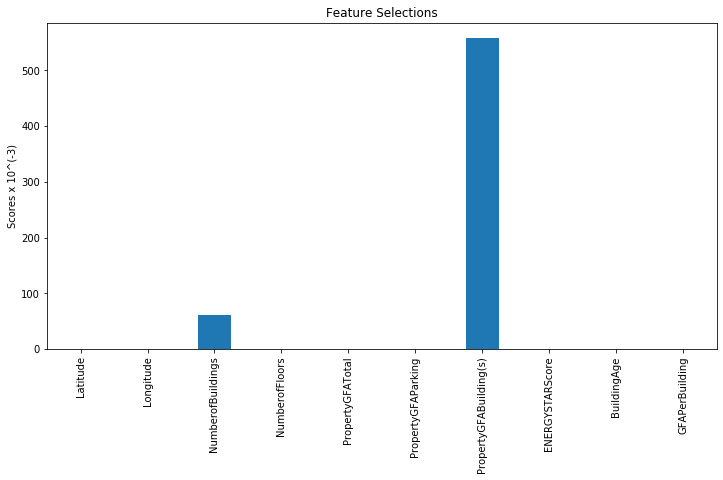

In [30]:
lasso = Lasso(alpha=best_alpha['alpha'], normalize=True, max_iter=100000)
lasso.fit(x_std,y_std)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_*10**3)
print(lasso_coeff)

feature_selected = pd.Series(lasso.coef_.flatten()*10**3, index=x_train.columns)
plt.figure(figsize=(12,6))
feature_selected.plot.bar()
plt.ylabel("Scores x 10^(-3)")
plt.title("Feature Selections")

In [31]:
# Liste of selected features
selected_feature_lasso = ['NumberofBuildings', 'PropertyGFABuilding(s)']

#### 2.2.3.2 With Ridge model 

                  Columns  Coefficient Estimate x 10^(-4)
0                Latitude                       -2.878409
1               Longitude                        3.084370
2       NumberofBuildings                       50.373792
3          NumberofFloors                       60.789572
4        PropertyGFATotal                      121.415280
5      PropertyGFAParking                       41.744560
6  PropertyGFABuilding(s)                      126.014607
7         ENERGYSTARScore                       -7.703588
8             BuildingAge                      -30.094056
9          GFAPerBuilding                       90.300155


Text(0.5, 1.0, 'Feature Selections')

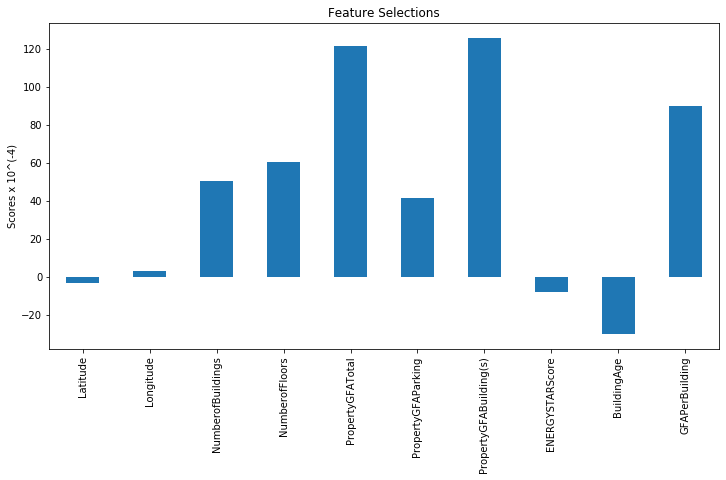

In [32]:
ridge = Ridge(alpha=50, normalize=True)
ridge.fit(x_std,y_std)

ridge_coeff = pd.DataFrame()
ridge_coeff["Columns"] = x_train.columns
ridge_coeff["Coefficient Estimate x 10^(-4)"] = pd.Series(ridge.coef_.flatten()*10**4)
print(ridge_coeff)

test_importances = pd.Series(ridge.coef_.flatten()*10**4, index=x_train.columns)
plt.figure(figsize=(12,6))
test_importances.plot.bar()
plt.ylabel("Scores x 10^(-4)")
plt.title("Feature Selections")

In [33]:
sel_ = SelectFromModel(Ridge(alpha=50, normalize=True))
sel_.fit(x_std, y_std)
sel_.get_support()
test_x_train = pd.DataFrame(x_std, columns=x_train.columns)
selected_feat = test_x_train.columns[(sel_.get_support())]
print('Total features: {}'.format((test_x_train.shape[1])))
print(f'Number of selected features: {len(selected_feat)}')
print(f"Features selected: {list(selected_feat)}")

Total features: 10
Number of selected features: 4
Features selected: ['NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GFAPerBuilding']


In [34]:
# Liste of selected features for Ridge
selected_feature_ridge = ['NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GFAPerBuilding']

#### 2.2.3.3 With Random Forest model

In [35]:
rf = RandomForestRegressor(n_estimators=1000, random_state=10)
rf.fit(x_std, np.ravel(y_std))
importances = rf.feature_importances_

Text(0.5, 1.0, 'Feature Importances')

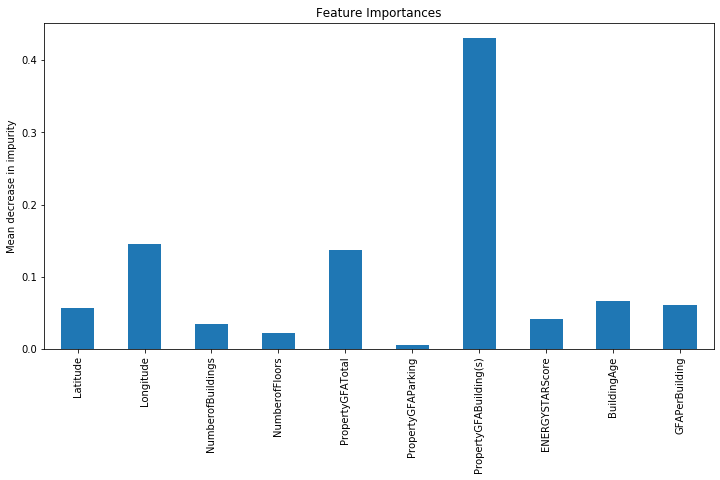

In [36]:
rf_importances = pd.Series(importances, index=x_train.columns)
plt.figure(figsize=(12,6))
rf_importances.plot.bar()
plt.ylabel("Mean decrease in impurity")
plt.title("Feature Importances")

### <font color="b" id="section_2_3">2.3. Categorical Feature Selection.</font>

In [37]:
# create a trainset for categorical variables
train_cat = trainset[list(trainset.select_dtypes(['object']).columns)+['SiteEnergyUse(kBtu)']]

In [38]:
x_train_cat, y_enrgy_train = preprocessing(train_cat)

In [39]:
#pip install category_encoders

The first step is to encode the data for modeling.

In [40]:
# prepare input data
x_train_enc = prepare_inputs(x_train_cat, y_enrgy_train)
# feature selection
x_train_fs, fs = correlation_select_features(x_train_enc, y_enrgy_train)
x_train_msf, msf = mutual_select_features(x_train_enc, y_enrgy_train)

BuildingType                  89.300036
PrimaryPropertyType            6.656220
CouncilDistrictCode           38.921749
Neighborhood                  39.610352
ListOfAllPropertyUseTypes    842.605316
LargestPropertyUseType         9.279365
dtype: float64


Text(0.5, 1.0, 'Feature Selection')

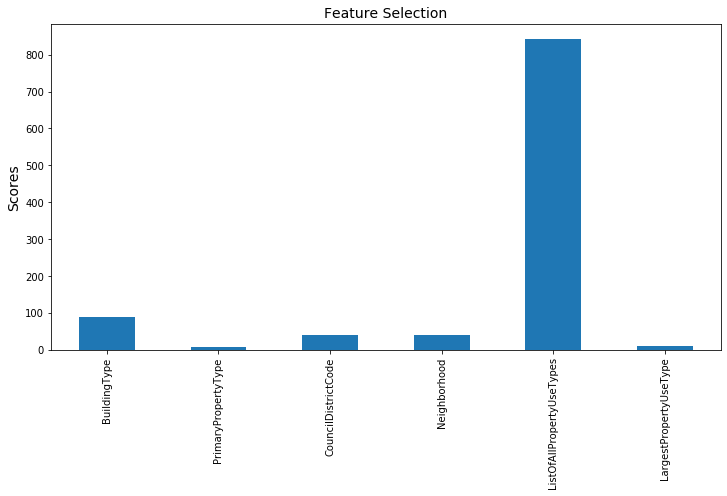

In [41]:
# plot the scores
fs_cat = pd.Series(fs.scores_, index=x_train_cat.columns)
print(fs_cat)
plt.figure(figsize=(12,6))
fs_cat.plot.bar()
plt.ylabel("Scores", size=14)
plt.title("Feature Selection", size=14)

BuildingType                 0.037602
PrimaryPropertyType          0.043132
CouncilDistrictCode          0.057087
Neighborhood                 0.062674
ListOfAllPropertyUseTypes    0.214284
LargestPropertyUseType       0.044130
dtype: float64


Text(0.5, 1.0, 'Feature Selection')

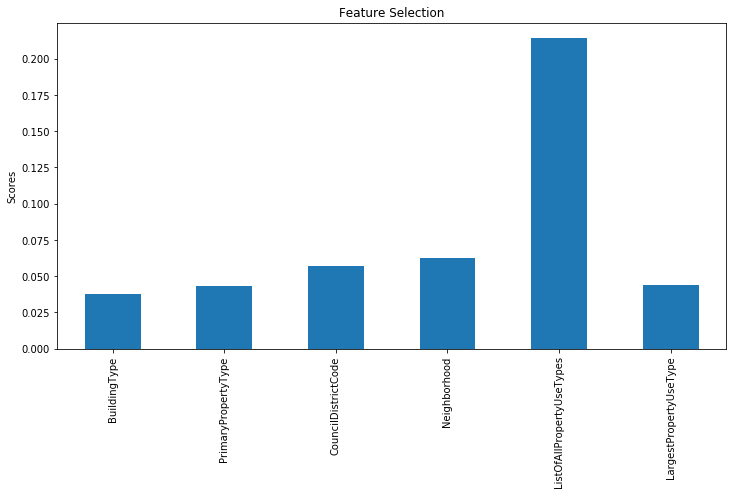

In [42]:
# plot the scores
msf_cat = pd.Series(msf.scores_, index=x_train_cat.columns)
print(msf_cat)
plt.figure(figsize=(12,6))
msf_cat.plot.bar()
plt.ylabel("Scores")
plt.title("Feature Selection")

#### Observation:

**Numerical features**

- PropertyGFABuilding(s) is more important than 'PropertyGFATotal' and 'GFAPerBuilding'. These two variables we will delete them because they are correlated with PropertyGFABuilding(s).

**Categorical features**

- Clearly the most important variable is: ListOfAllPropertyUseTypes.


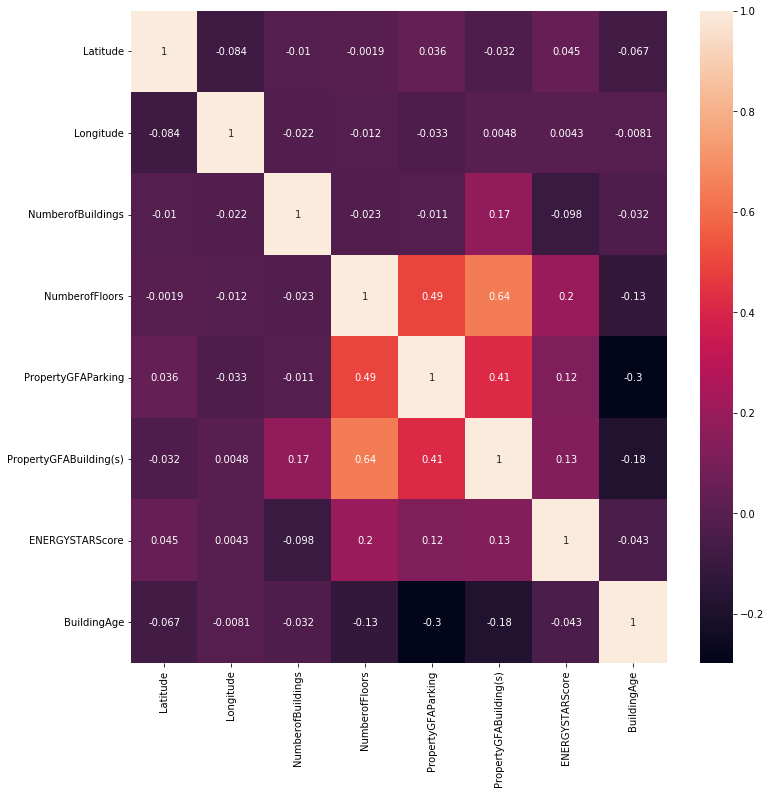

In [43]:
# Plot of the correlation matrix after removing the correlated features ('PropertyGFATotal' and 'GFAPerBuilding').
plt.figure(figsize=(12,12))
sns.heatmap(x_train.drop(['PropertyGFATotal','GFAPerBuilding'], axis=1).corr(),annot=True)

**We notice that there is no longer any correlation between features greater than 70%**

#### Feature Selections Summary

We will run the models with two scenarios:
    
     1- Only with features selected by feature selection techniques (with and without ENERGYSTARScore).
     2- With all the Features except those that are correlated (with and without ENERGYSTARScore).

In [44]:
fs_num = ['NumberofBuildings', 'BuildingAge','NumberofFloors', 'PropertyGFABuilding(s)', 'ENERGYSTARScore']
fs_cat = ['ListOfAllPropertyUseTypes']

In [45]:
all_num = ['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore',
                    'PropertyGFAParking', 'PropertyGFABuilding(s)', 'BuildingAge']
all_cat = ['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
                    'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']

## <font color="b" id="section_3">3. Modeling </font>

In [46]:
# create regression models 
svr = SVR()
knn = KNeighborsRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
lasso = Lasso(random_state=10, max_iter=200000)
rdg = Ridge()

In [47]:
# We define the hyperparameters of the models 
param_grid_knn = {'kneighborsregressor__n_neighbors': np.arange(1,100),
                  'kneighborsregressor__metric': ['euclidean', 'manhattan']
                 }
param_grid_svr = {"svr__C": [1e0, 1e1, 1e2, 1e3], 
                  "svr__gamma": np.logspace(-2, 2, 5)
                 }
param_grid_rfr = {'randomforestregressor__n_estimators': [10,20,30,100,200,300],
                  'randomforestregressor__max_depth': [5, 10, 20, 40], 
                  'randomforestregressor__min_samples_split': [2,4,8,10]
                 }
param_grid_xgb = {'xgbregressor__n_estimators': [400, 700, 1000],
                  'xgbregressor__max_depth': np.arange(1,11,3),
                  'xgbregressor__eta': [0.3, 0.1, 0.01],
                  'xgbregressor__subsample': [0.7, 0.8, 0.9],
                  'xgbregressor__colsample_bytree': [0.7, 0.8]
                 }
param_grid_rdg = {'ridge__alpha':np.arange(1,701,100)}
param_grid_lasso = {'lasso__alpha': (np.logspace(-4,-0.5,30))} 
                   

In [48]:
# we use mse as score and set greater_is_better=False
score = make_scorer(mean_squared_error, greater_is_better=False)

### <font color="b" id="section_3_1">3.1 Modeling with selected features </font>

### <font color="b" id="section_3_1_1">3.1.1 With ENERGYSTARScore </font>

In [49]:
# prepare the input data.
x_train, y_train, x_test, y_test = x_y_split(trainset, testset, fs_num, fs_cat, y_enrgy_train, y_enrgy_test)
column_norm_trans = column_trans(fs_num, fs_cat)

#### - K Neighbors Regressor

best parameters:  {'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 8}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   

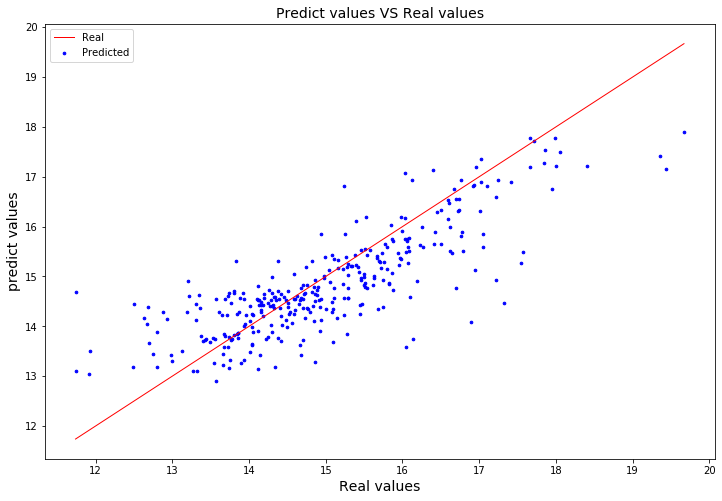

In [50]:
model_knn = best_score_model(knn, column_norm_trans, param_grid_knn, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_knn, x_train, y_train, x_test, y_test)

Higher Bias and higher Variance, this means that this model does not give good results.

#### - Support Vector Regressor

best parameters:  {'svr__C': 10.0, 'svr__gamma': 0.1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore']),
                           

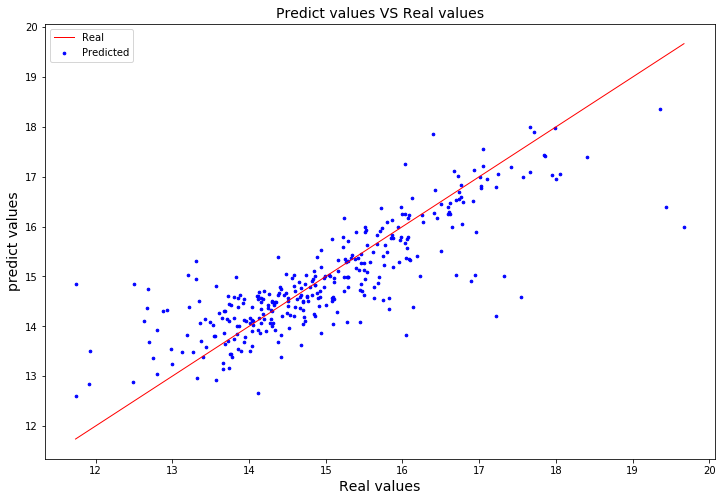

In [51]:
model_svr = best_score_model(svr, column_norm_trans, param_grid_svr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_svr, x_train, y_train, x_test, y_test)

Lower Bias and mean Variance, this means that this model is one of the most suitable for the data.

#### - Random Forest Regressor

best parameters:  {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_split': 8, 'randomforestregressor__n_estimators': 300}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
   

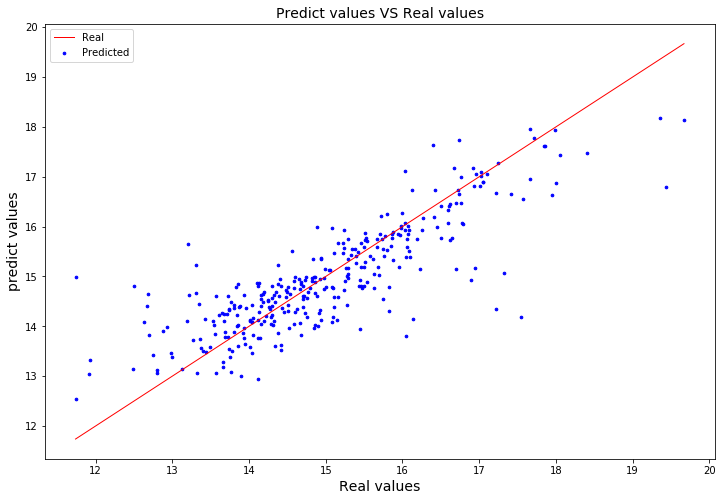

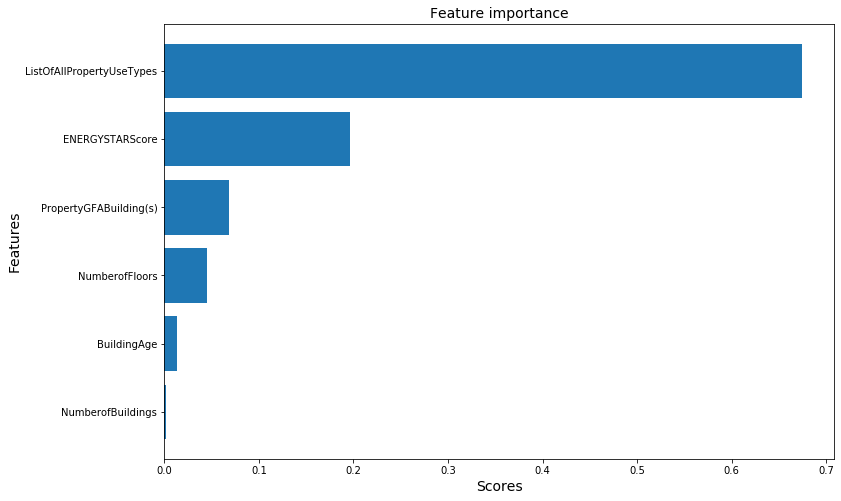

In [52]:
model_rfr = best_score_model(rfr, column_norm_trans, param_grid_rfr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rfr, x_train, y_train, x_test, y_test)
feature_importance(model_rfr, x_train)

Lower Bias and mean Variance, this means that this model is one of the most suitable for the data.

#### - XGBoost Regressor

best parameters:  {'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__eta': 0.01, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 1000, 'xgbregressor__subsample': 0.7}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                               

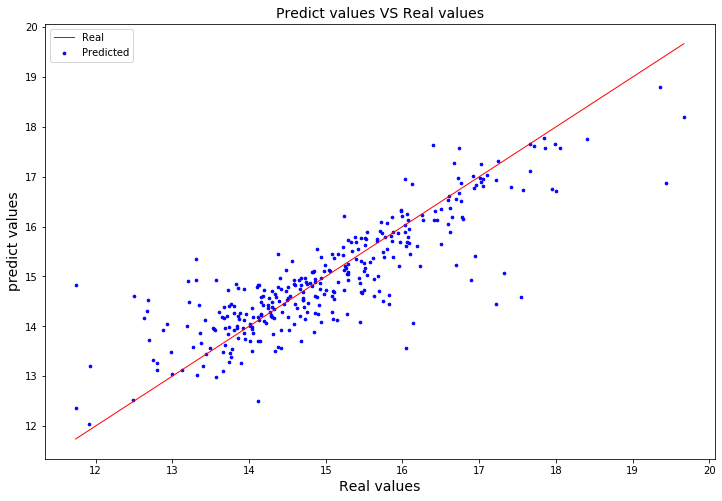

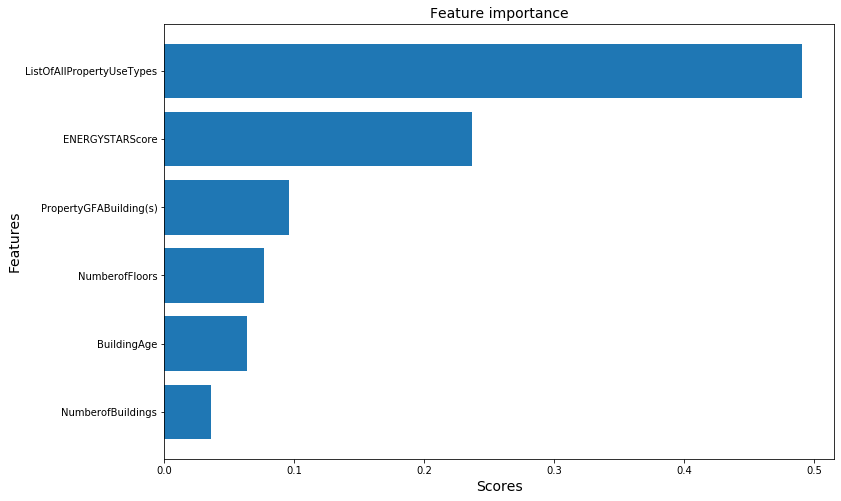

In [53]:
model_xgb = best_score_model(xgb, column_norm_trans, param_grid_xgb, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_xgb, x_train, y_train, x_test, y_test)
feature_importance(model_xgb, x_train)

higher Bias and good Variance, this means that this model is the most suitable for the data.

#### - Ridge

best parameters:  {'ridge__alpha': 1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore']),
                                           

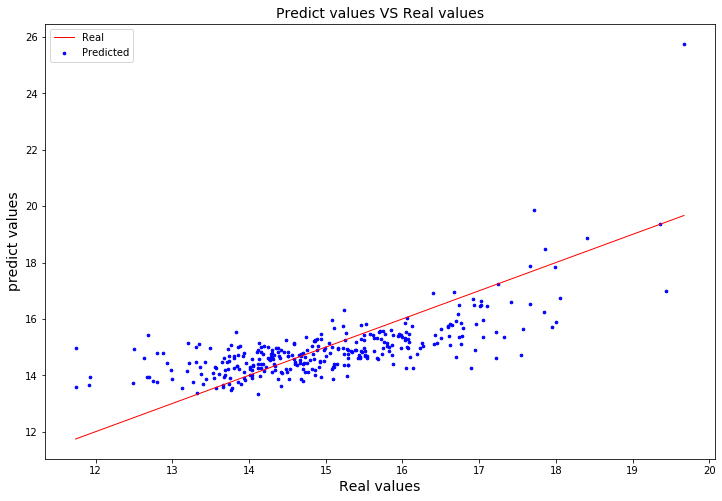

In [54]:
model_rdg = best_score_model(rdg, column_norm_trans, param_grid_rdg, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rdg, x_train, y_train, x_test, y_test)

Mean Bias and higher Variance, this means that this model does not give good results.

#### - LASSO

best parameters:  {'lasso__alpha': 0.006461670787466976}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore']),
                        

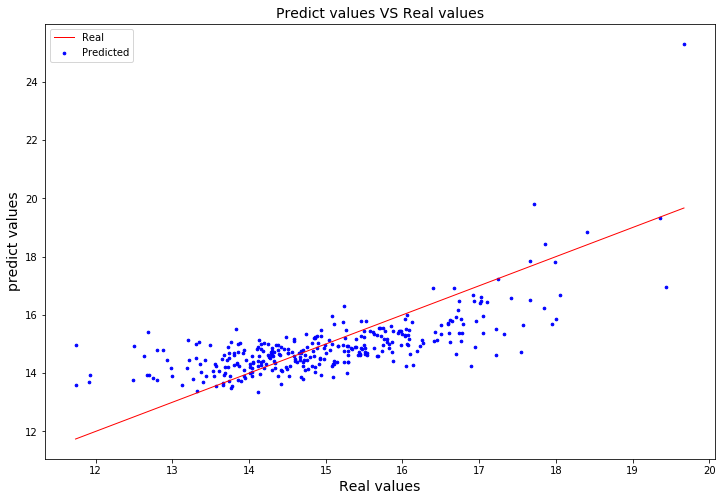

In [55]:
model_lasso = best_score_model(lasso, column_norm_trans, param_grid_lasso, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_lasso, x_train, y_train, x_test, y_test)

Mean Bias and higher Variance, this means that this model does not give good results.

### <font color="b" id="section_3_1_2">3.1.2 Without ENERGYSTARScore </font>

In [56]:
# we remove ENERGYSTARScore from the list of numerical features
fs_num.remove("ENERGYSTARScore")
# update of variables.
x_train, y_train, x_test, y_test = x_y_split(trainset, testset, fs_num, fs_cat, y_enrgy_train, y_enrgy_test)
column_norm_trans = column_trans(fs_num, fs_cat)

#### - K Neighbors Regressor

best parameters:  {'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 10}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)']),
                                                

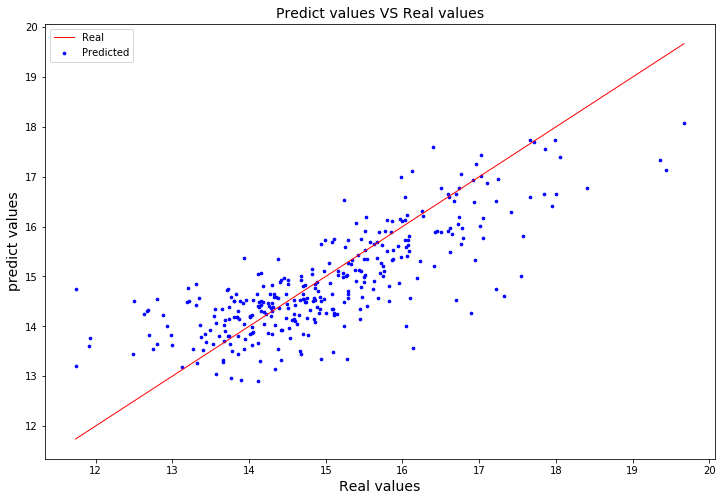

In [57]:
model_knn = best_score_model(knn, column_norm_trans, param_grid_knn, 
                             x_train, y_train, x_test, y_test ,score)
prediction(model_knn, x_train, y_train, x_test, y_test)

#### - Support Vector Regressor

best parameters:  {'svr__C': 10.0, 'svr__gamma': 0.1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)']),
                                                 ('targetencoder',
                              

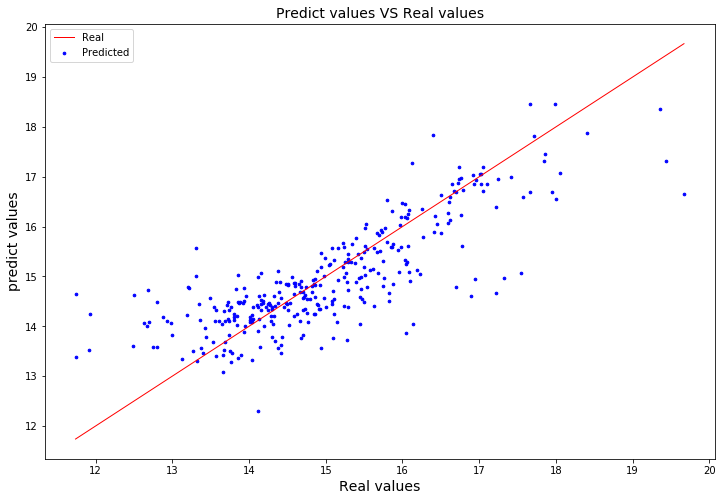

In [58]:
model_svr = best_score_model(svr, column_norm_trans, param_grid_svr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_svr, x_train, y_train, x_test, y_test)

#### - Random Forest Regressor

best parameters:  {'randomforestregressor__max_depth': 5, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 200}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)']),
 

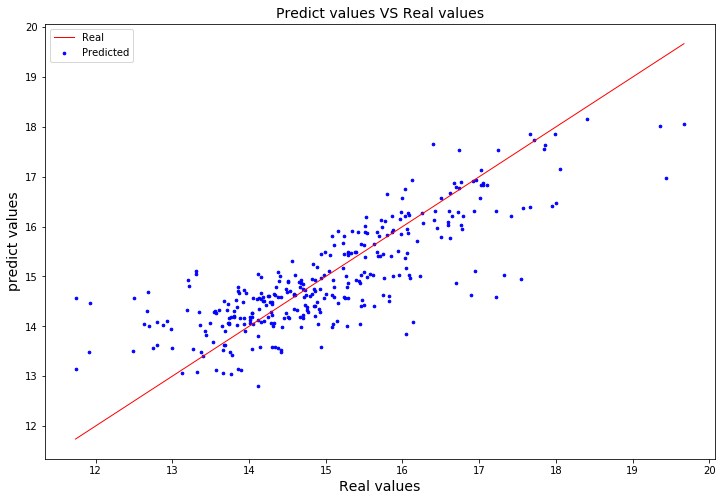

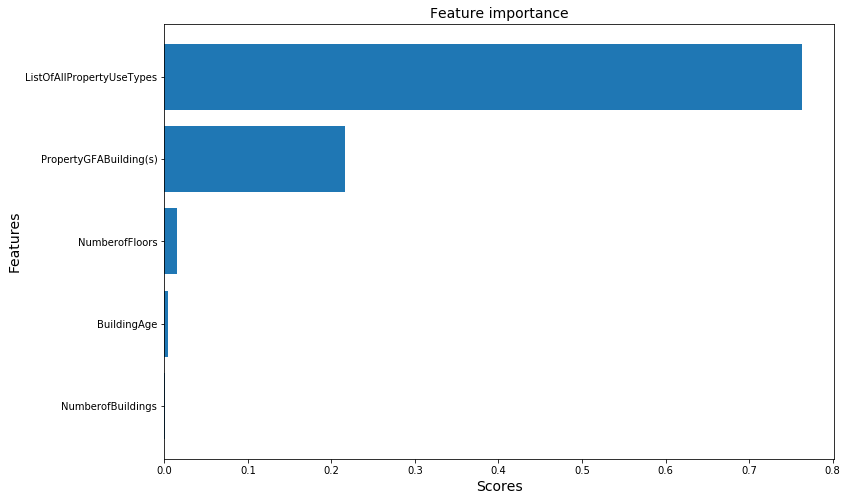

In [59]:
model_rfr = best_score_model(rfr, column_norm_trans, param_grid_rfr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rfr, x_train, y_train, x_test, y_test)
feature_importance(model_rfr, x_train)

#### - XGBoost Regressor

best parameters:  {'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__eta': 0.01, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 700, 'xgbregressor__subsample': 0.7}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                

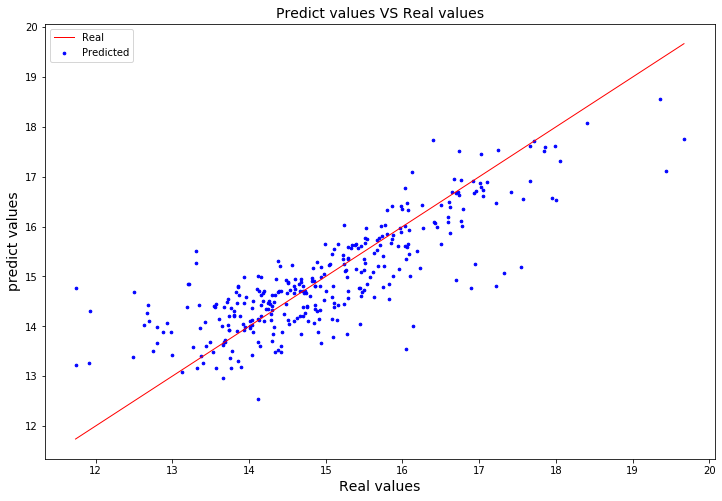

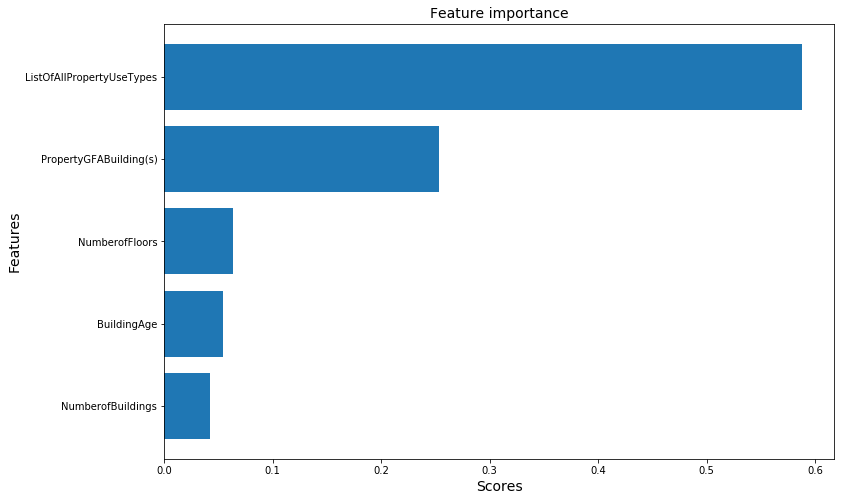

In [60]:
model_xgb = best_score_model(xgb, column_norm_trans, param_grid_xgb, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_xgb, x_train, y_train, x_test, y_test)
feature_importance(model_xgb, x_train)

#### - Ridge

best parameters:  {'ridge__alpha': 1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)']),
                                                 ('targetencoder',
                                              

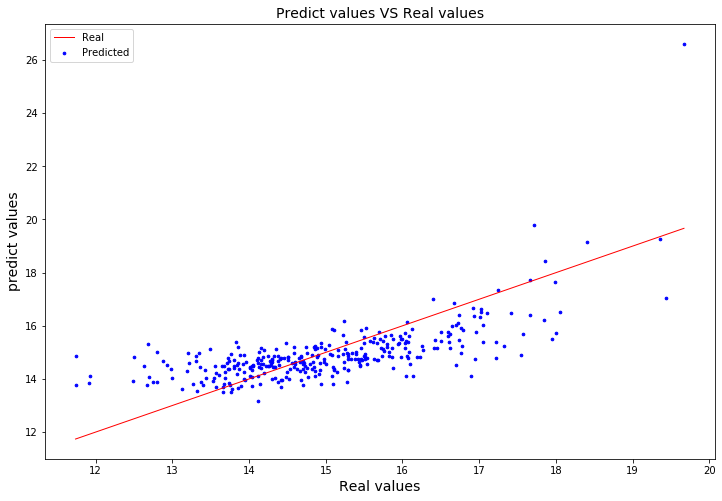

In [61]:
model_rdg = best_score_model(rdg, column_norm_trans, param_grid_rdg, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rdg, x_train, y_train, x_test, y_test)

#### - LASSO

best parameters:  {'lasso__alpha': 0.011264816923358867}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['NumberofBuildings',
                                                   'BuildingAge',
                                                   'NumberofFloors',
                                                   'PropertyGFABuilding(s)']),
                                                 ('targetencoder',
                           

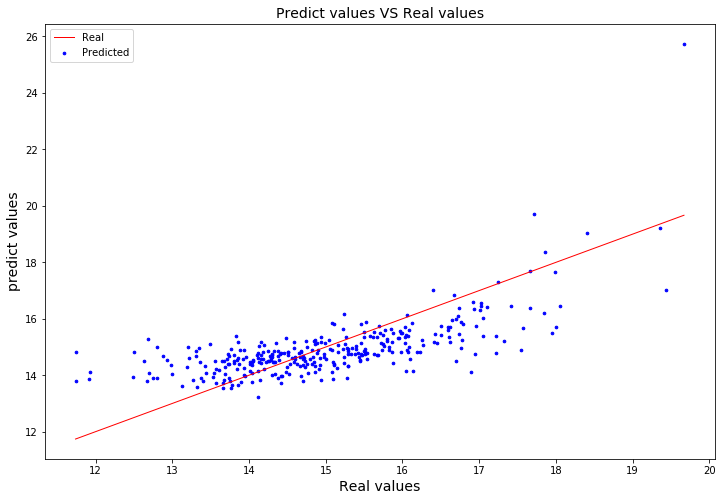

In [62]:
model_lasso = best_score_model(lasso, column_norm_trans, param_grid_lasso, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_lasso, x_train, y_train, x_test, y_test)

### <font color="b" id="section_3_2">3.2 Modeling with all features  </font>

### <font color="b" id="section_3_2_1">3.2.1 With ENERGYSTARScore </font>

In [63]:
# update of variables.
x_train, y_train, x_test, y_test = x_y_split(trainset, testset, all_num, all_cat, y_enrgy_train, y_enrgy_test)
column_norm_trans = column_trans(all_num, all_cat)

#### - K Neighbors Regressor

best parameters:  {'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 10}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                               

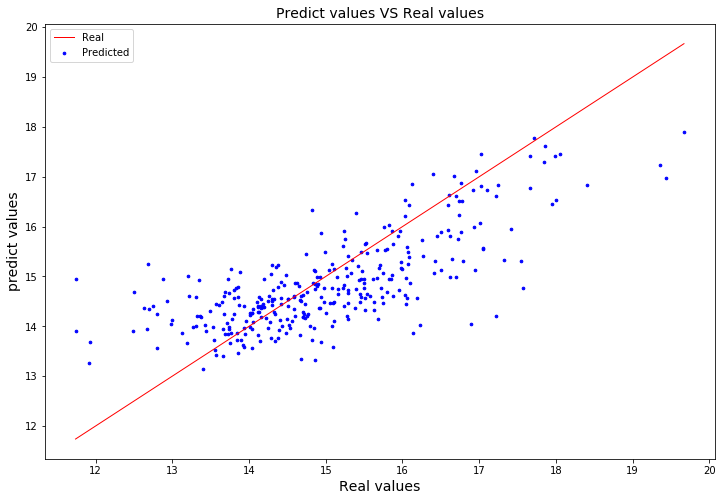

In [64]:
model_knn = best_score_model(knn, column_norm_trans, param_grid_knn, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_knn, x_train, y_train, x_test, y_test)

#### - Support Vector Regressor

best parameters:  {'svr__C': 100.0, 'svr__gamma': 0.01}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'PropertyGFAParking',
                     

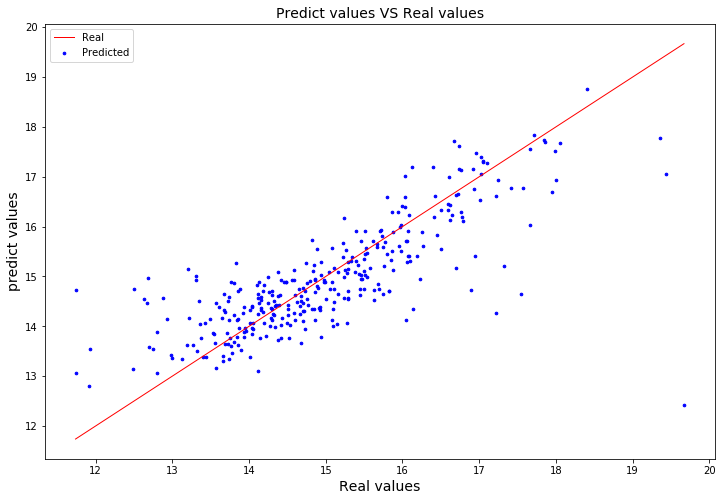

In [65]:
model_svr = best_score_model(svr, column_norm_trans, param_grid_svr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_svr, x_train, y_train, x_test, y_test)

#### - Random Forest Regressor

best parameters:  {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 200}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',


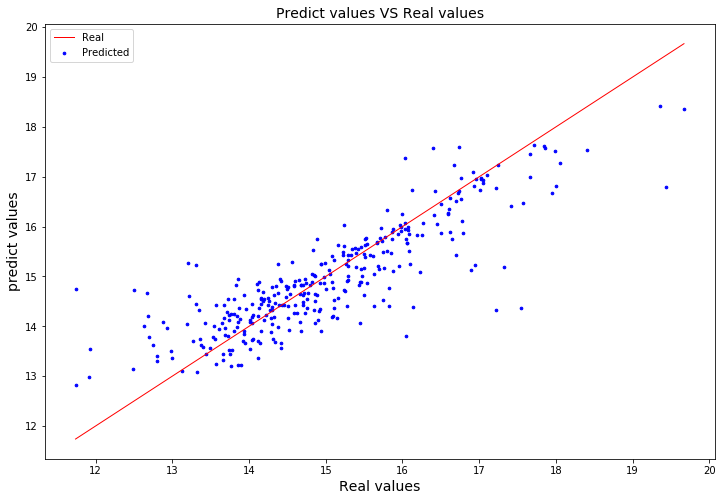

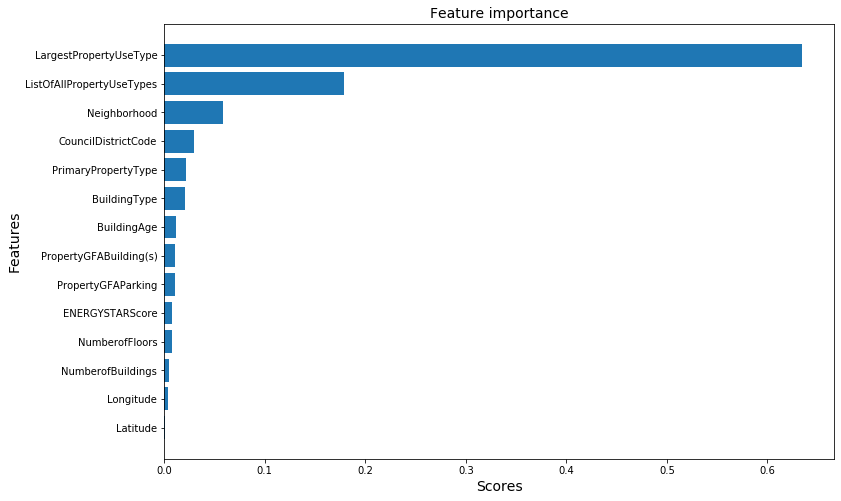

In [66]:
model_rfr = best_score_model(rfr, column_norm_trans, param_grid_rfr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rfr, x_train, y_train, x_test, y_test)
feature_importance(model_rfr, x_train)

#### - XGBoost Regressor

best parameters:  {'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__eta': 0.01, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 1000, 'xgbregressor__subsample': 0.7}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                     

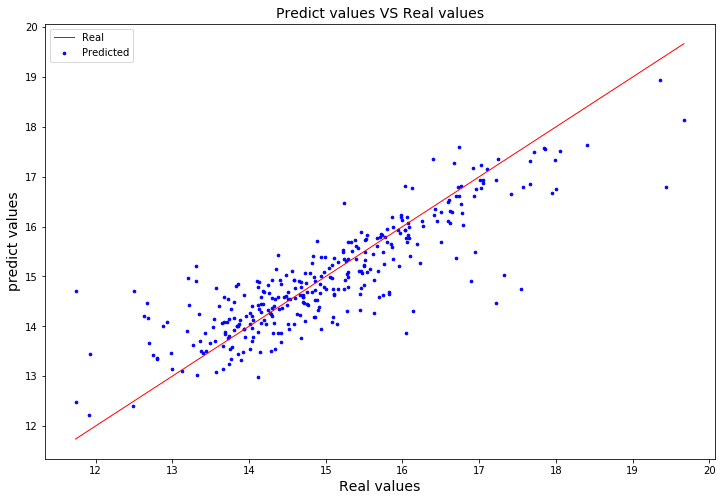

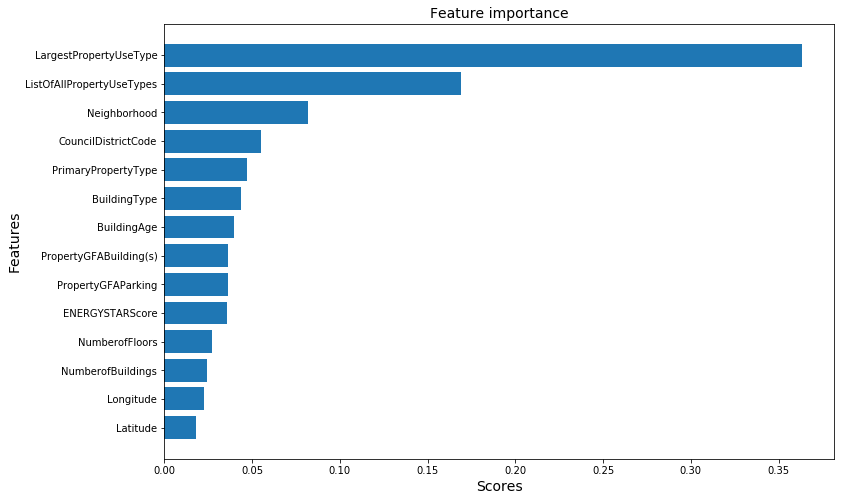

In [67]:
model_xgb = best_score_model(xgb, column_norm_trans, param_grid_xgb, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_xgb, x_train, y_train, x_test, y_test)
feature_importance(model_xgb, x_train)

#### - Ridge

best parameters:  {'ridge__alpha': 1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'PropertyGFAParking',
                                       

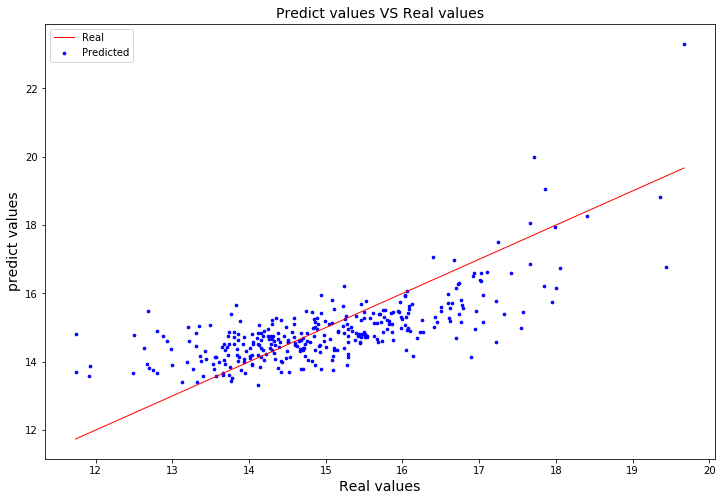

In [68]:
model_rdg = best_score_model(rdg, column_norm_trans, param_grid_rdg, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rdg, x_train, y_train, x_test, y_test)

#### - LASSO

best parameters:  {'lasso__alpha': 0.006461670787466976}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'PropertyGFAParking',
                    

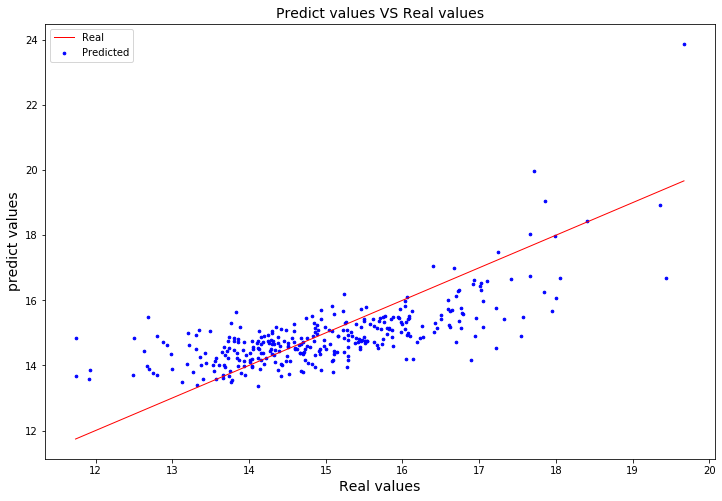

In [69]:
model_lasso = best_score_model(lasso, column_norm_trans, param_grid_lasso, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_lasso, x_train, y_train, x_test, y_test)

### <font color="b" id="section_3_2_2">3.2.2 Without ENERGYSTARScore </font>

In [70]:
# we remove ENERGYSTARScore from the list of numerical features
all_num.remove("ENERGYSTARScore")
# update of variables.
x_train, y_train, x_test, y_test = x_y_split(trainset, testset, all_num, all_cat, y_enrgy_train, y_enrgy_test)
column_norm_trans = column_trans(all_num, all_cat)

#### - K Neighbors Regressor

best parameters:  {'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 8}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                             

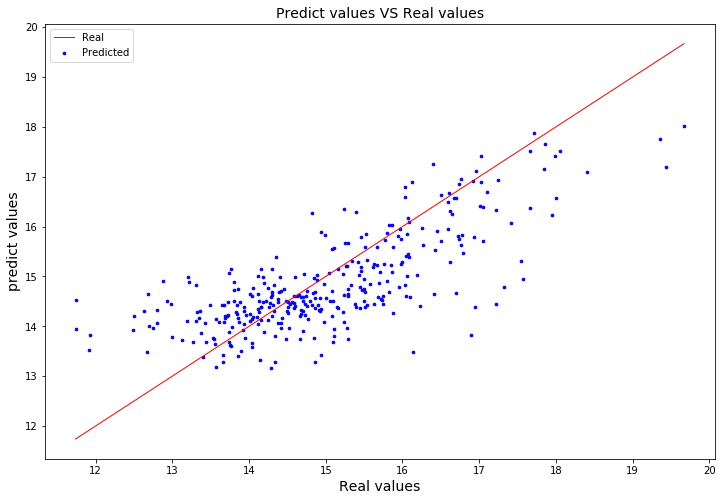

In [71]:
model_knn = best_score_model(knn, column_norm_trans, param_grid_knn, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_knn, x_train, y_train, x_test, y_test)

#### - Support Vector Regressor

best parameters:  {'svr__C': 100.0, 'svr__gamma': 0.01}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
              

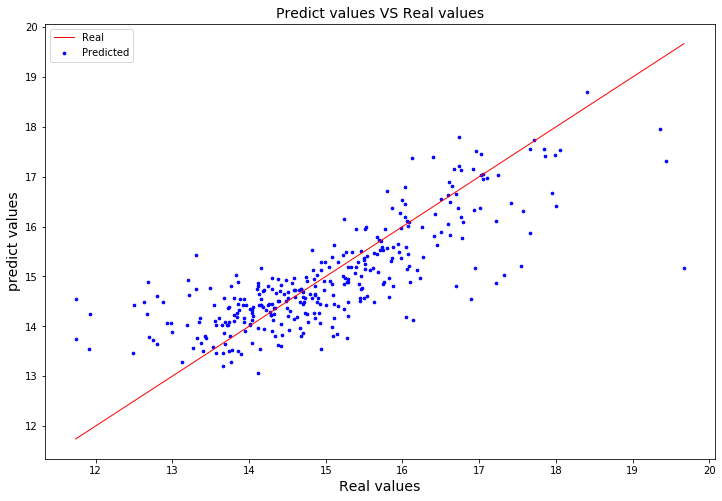

In [72]:
model_svr = best_score_model(svr, column_norm_trans, param_grid_svr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_svr, x_train, y_train, x_test, y_test)

#### - Random Forest Regressor

best parameters:  {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 300}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParkin

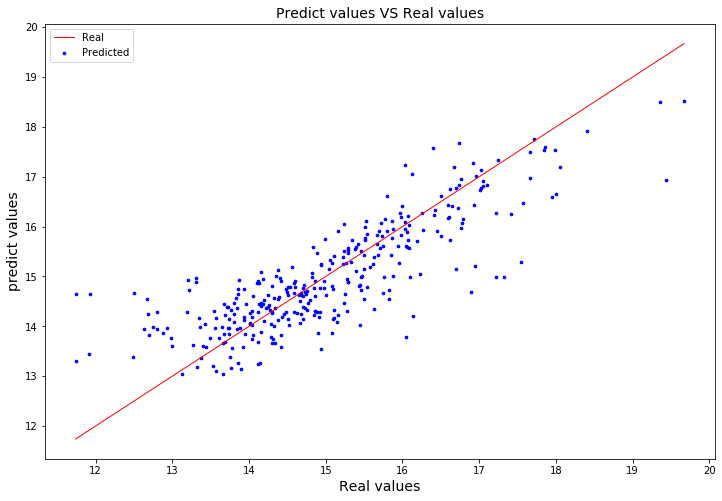

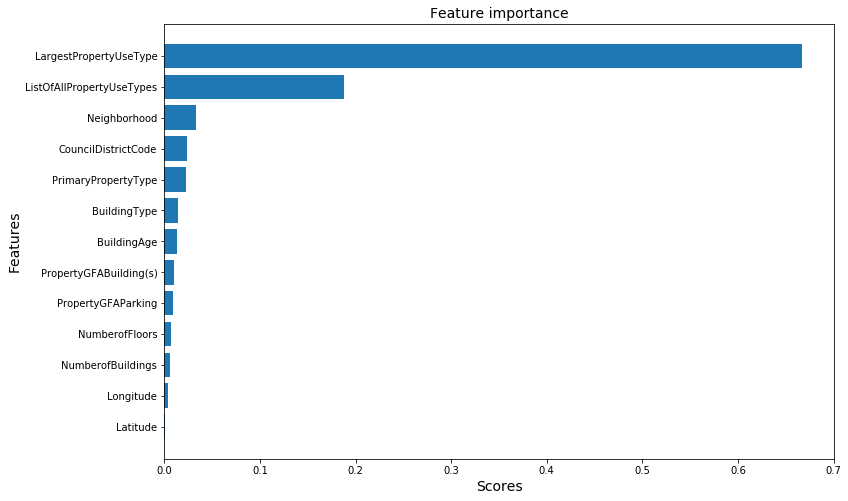

In [73]:
model_rfr = best_score_model(rfr, column_norm_trans, param_grid_rfr, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rfr, x_train, y_train, x_test, y_test)
feature_importance(model_rfr, x_train)

#### - XGBoost Regressor

best parameters:  {'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__eta': 0.01, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 1000, 'xgbregressor__subsample': 0.7}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                     

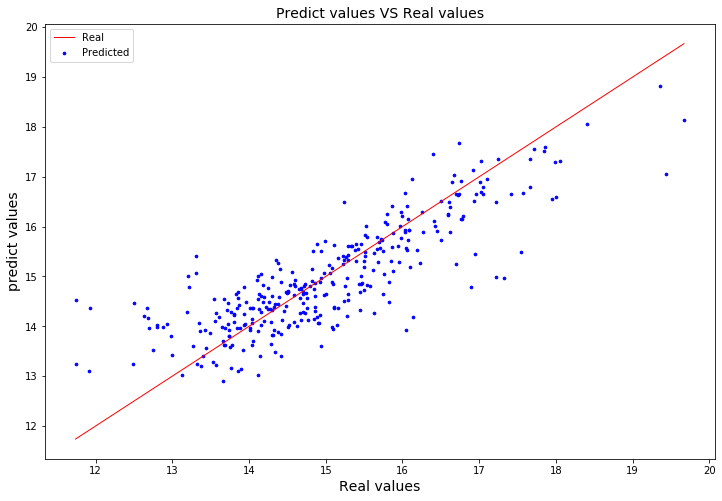

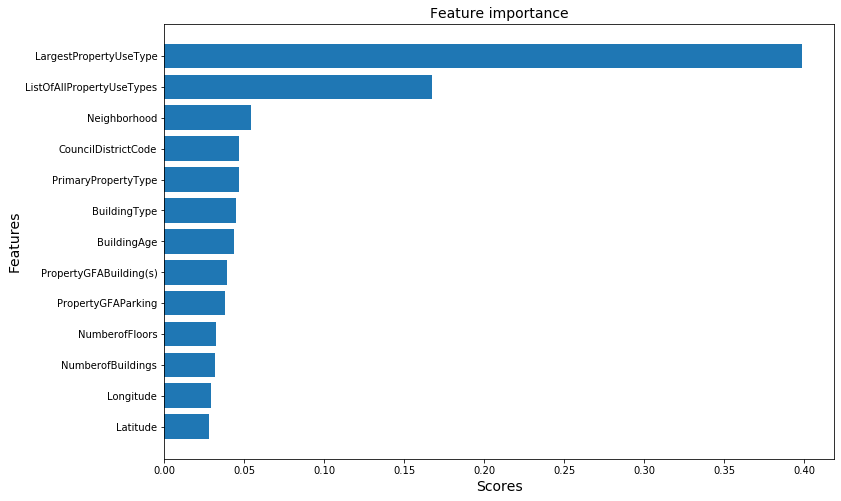

In [74]:
model_xgb = best_score_model(xgb, column_norm_trans, param_grid_xgb, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_xgb, x_train, y_train, x_test, y_test)
feature_importance(model_xgb, x_train)

#### - Ridge

best parameters:  {'ridge__alpha': 1}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                

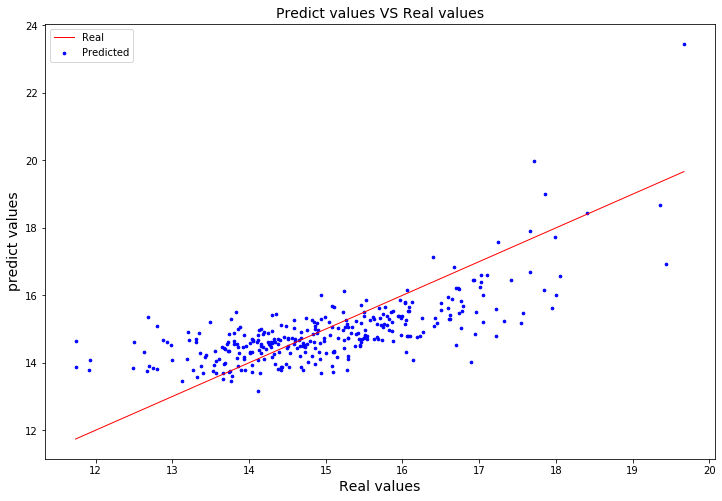

In [75]:
model_rdg = best_score_model(rdg, column_norm_trans, param_grid_rdg, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_rdg, x_train, y_train, x_test, y_test)

#### - LASSO

best parameters:  {'lasso__alpha': 0.006461670787466976}
best model:  Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Latitude', 'Longitude',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
             

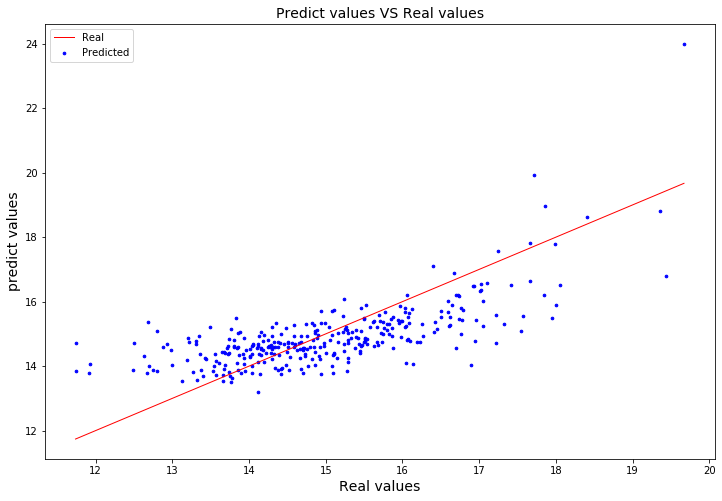

In [76]:
model_lasso = best_score_model(lasso, column_norm_trans, param_grid_lasso, 
                             x_train, y_train, x_test, y_test, score)
prediction(model_lasso, x_train, y_train, x_test, y_test)

### Conlusion & Perspective

#### ENERGYSTARscore

*It is clear that the ENERGY STARScore variable provides some improvement for all the models tested, but on the other hand it is difficult to know if this improvement is really significant. It is also necessary to take into account the benefit with respect to the cost of this ENERGY STAR Score.*

#### Model selection

The model which gives the best score is the XGBoost Regressor, the linear models give bad results.

#### Perspective

The models tested do not give good results, R2<80%, it may be a lack of data such as the operation of each building, the number and type of machine in each building... these additional parameters would undoubtedly improve the accuracy of models.